# Intro to Obspy

Obspy is a Python package for seismology. It contains a wide range of tools, from fundamental input/output (IO) functions, up to higher
level functions including noise analysis, beamforming and wrappers for travel-time calculations.  Obspy has rapidly gained popularity,
as of February 2019, Obspy version 1.1.0 had been installed from conda-forge 11,720 times in the 3 months that it was the current version.

## Python

<img alt="Python logo" align="right" style="width:40%" src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png">

Python as a language is widely used, both within the scientific community and in more applied work. It is also open-source, meaning that
the licence limitations of something like Matlab are not an issue.  Because Python is widely used there are some fantastic libraries,
meaning that you do not need to re-invent the wheel - someone has probably solved your problem already - meaning you can focus on
doing science. Furthermore, because Python is used beyond academia, it is a useful, transferable language to learn.

Python is an interpreted language, meaning that you do not need to actively compile code to machine code before executing your core
(unlike languages like C or Fortran). This means that you can rapidly test short ideas, and allows us to make use of things like
Jupyter notebooks and the iPython interpretter.  In general interpreted languages are slower than compilled languages, and this
is generally true for Python as well.  However, because Python is simple to extend with compiled languages (particularly C), Python
provide a good *glue* between faster code components.  It is normal to convert time-critical sections of code to C and link these
to a Python library. Numpy makes good use of this, and links some very fast compiled maths libraries (LAPACK and BLAS) in to Python.

## Obspy

<img alt="Obspy logo" align="right" style="width:40%" src="https://raw.github.com/obspy/website/master/logo/obspy_logo_full_highres.png">

Obspy is actively maintained, developed and tested by an international group of seismologists.  Obspy also implements a good 
*continuous integration* workflow, whereby any proposed changes to the package are tested before they are accepted. The complete
package is also tested prior to release, ensuring that Obspy does what it is supposed to. This kind of testing is incredibly
important, and, while it does not guarantee correctness, it is a very necessary step to test code to ensure that it does what
you expect it to.  Obspy also has fairly extensive documentation and good examples and tutorials.

This notebook provides a really brief overview of some of the "every-day" functionality of Obspy that you will use within this
course.  We will cover:
- Reading and writing seismic data
- Plotting seismic data
- Filtering seismic data
- Plotting spectrograms
- Getting data from data centres
- Reading in event data
- Accesing relevant event information within a catalog
- Plotting earthquake maps

In [1]:
# Notebook set-up
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Reading seismic data

Obspy provides a nice plug-in system for reading various seismic data formats.  As part of this
obspy will attempt to auto-recognise your data format and read it. As long as you know where the
data are, you have a good chance of being able to read it.

We will try reading in some data from the Data directory which should have come with these notebooks.  The data we will read is a multiplexed miniseed file, which has been compressed using STEIM2 compression.
Multiplexed means that it contains data from multiple channels, miniseed is a standard seismic data format
used extensively by data-centres for storing waveform data, and STEIM2 is a form of compression.  The data
are from five stations in New Zealand close to the Kaikoura M7.8 earthquake epicenter, and show the seconds
before the mainshock and the first arrivals.  The stations use broadband seismometers and suffer
from clipping during the Kaikoura wavetrain.  We will plot just the vertical components.

12 Trace(s) in Stream:
NZ.GVZ.10.HHE | 2016-11-13T11:01:42.348393Z - 2016-11-13T11:04:11.468393Z | 100.0 Hz, 14913 samples
NZ.GVZ.10.HHN | 2016-11-13T11:01:45.528393Z - 2016-11-13T11:04:11.968393Z | 100.0 Hz, 14645 samples
NZ.GVZ.10.HHZ | 2016-11-13T11:01:43.618393Z - 2016-11-13T11:04:11.168393Z | 100.0 Hz, 14756 samples
NZ.KHZ.10.HHE | 2016-11-13T11:01:45.958389Z - 2016-11-13T11:04:11.738389Z | 100.0 Hz, 14579 samples
NZ.KHZ.10.HHN | 2016-11-13T11:01:42.968389Z - 2016-11-13T11:04:11.878389Z | 100.0 Hz, 14892 samples
NZ.KHZ.10.HHZ | 2016-11-13T11:01:44.608389Z - 2016-11-13T11:04:11.528389Z | 100.0 Hz, 14693 samples
NZ.LTZ.10.HHE | 2016-11-13T11:01:44.968393Z - 2016-11-13T11:04:11.918393Z | 100.0 Hz, 14696 samples
NZ.LTZ.10.HHN | 2016-11-13T11:01:42.218393Z - 2016-11-13T11:04:11.878393Z | 100.0 Hz, 14967 samples
NZ.LTZ.10.HHZ | 2016-11-13T11:01:40.638393Z - 2016-11-13T11:04:11.558393Z | 100.0 Hz, 15093 samples
NZ.THZ.10.HHE | 2016-11-13T11:01:42.713199Z - 2016-11-13T11:04:11.303199Z | 1

/Users/goride42/miniconda/envs/GPHS445/lib/python3.7/site-packages/matplotlib/dates.py:1322: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  ' Defaulting to {0}.'.format(interval))


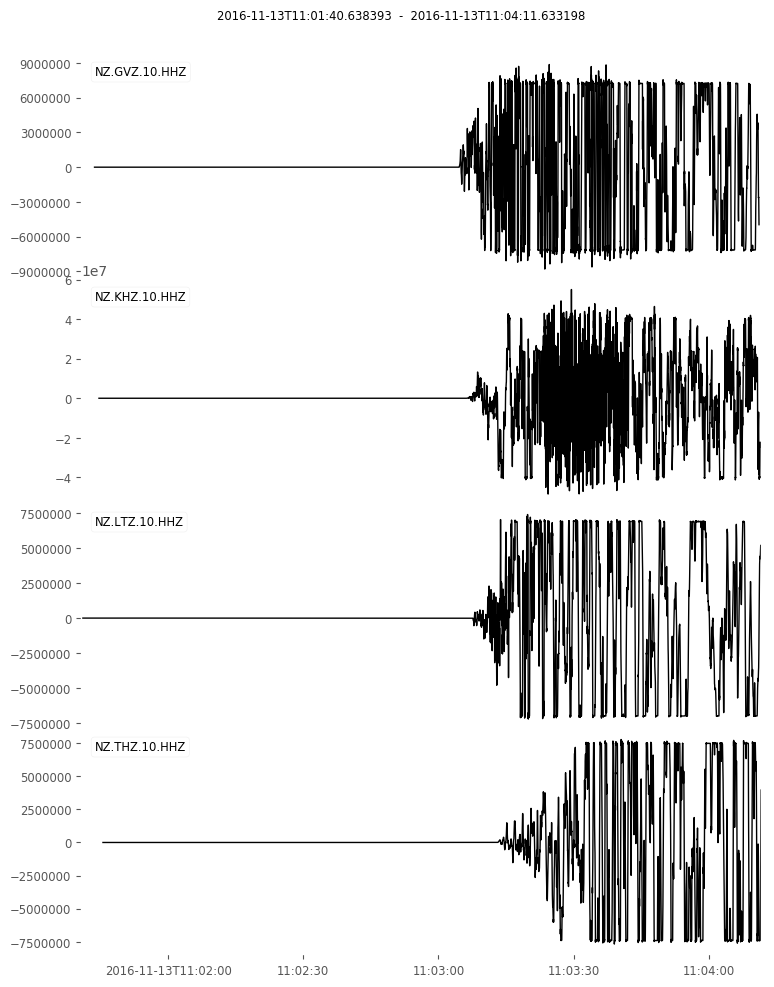

In [3]:
from obspy import read

st = read("Data/kaikoura_geonet.ms")
print(st)
# NBVAL_IGNORE_OUTPUT
fig = st.select(component="Z").plot(equal_scale=False)

We can get lots of information from these streams (a Stream in obspy is a list of channels of data,
each channel of data is referred to as a *Trace*).  We will look at the information for the vertical
channel of station LTZ:

In [4]:
tr = st.select(station="LTZ", channel="HHZ")
# Select returns a stream of traces that match your selection.
# There is only one trace matching LTZ, channel HHZ, so we will
# just take that trace using standard Python indexing
tr = tr[0]
print(tr)

NZ.LTZ.10.HHZ | 2016-11-13T11:01:40.638393Z - 2016-11-13T11:04:11.558393Z | 100.0 Hz, 15093 samples


Traces have two fundamental attributes: `data` and `stats`.  `data` is just a numpy array of
values that represent the waveform held. `stats` contains header information associated
with the data, including the start-time, end-time, station and channel information, and
can contain a record of the processing done to the data.

Lets look at the `stats` for this trace:

In [5]:
print(tr.stats)

         network: NZ
         station: LTZ
        location: 10
         channel: HHZ
       starttime: 2016-11-13T11:01:40.638393Z
         endtime: 2016-11-13T11:04:11.558393Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 15093
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 72, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 456704})


**Exercise:** Do all the traces that we read in start and end at the same time? 

You can access individual attributes of the `stats` by writing `tr.stats.attribute`, for example,
the sampling rate is accessed using `tr.stats.sampling_rate`.

These data were downloaded from the GeoNet FDSN client without any changes to them, with a request 
to start and end at the same times. However, often data-centers will not provide exactly what you 
wanted to make it more efficient for them to supply you information.  You should check that you 
get what you ask for!

## Writing data

We can write this data out to a 
[range of formats](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.write.html#supported-formats), 
for now we will try writing to SAC format.  SAC is the Seismic Analysis Code, and is both a data format and
a code-base for data analysis.  The SAC data format does not support multiplexing, so we will write one
trace per file, using a loop.

In [6]:
for trace in st:
    filename = "Data/{0}.SAC".format(trace.id)  # The id is the SEED ID
    print("Writing to {0}".format(filename))
    trace.write(filename=filename, format="SAC")

Writing to Data/NZ.GVZ.10.HHE.SAC
Writing to Data/NZ.GVZ.10.HHN.SAC
Writing to Data/NZ.GVZ.10.HHZ.SAC
Writing to Data/NZ.KHZ.10.HHE.SAC
Writing to Data/NZ.KHZ.10.HHN.SAC
Writing to Data/NZ.KHZ.10.HHZ.SAC
Writing to Data/NZ.LTZ.10.HHE.SAC
Writing to Data/NZ.LTZ.10.HHN.SAC
Writing to Data/NZ.LTZ.10.HHZ.SAC
Writing to Data/NZ.THZ.10.HHE.SAC
Writing to Data/NZ.THZ.10.HHN.SAC
Writing to Data/NZ.THZ.10.HHZ.SAC


**Exercise:** Read back in the SAC data you have just written - do you see any difference in the `stats`?

## Plotting seismic data

We have already seen that we can easily plot seismic data using the `.plot` method on a `Stream`.
We can do the same with `Trace`s.  We can also use `starttime` and `endtime` arguments to only
plot a section of data.  This will also demonstrate the use of Obspy's `UTCDateTime` object.  This
holds date-time information, and extends Python's native `datetime` functionality to greater precision
and back further in time.

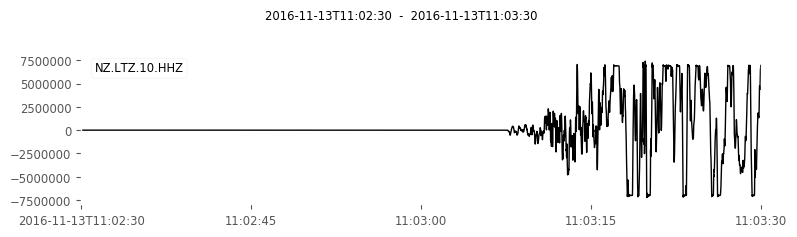

In [7]:
from obspy import UTCDateTime

fig = tr.plot(starttime=UTCDateTime(2016, 11, 13, 11, 2, 30),
              endtime=UTCDateTime(2016, 11, 13, 11, 3, 30))

We see the first arriving P-wave from the Kaikoura mainshock and the subsequent growth of amplitudes
as the earthquake gets going.

For fun, lets zoom right in on the few seconds before the P-wave...

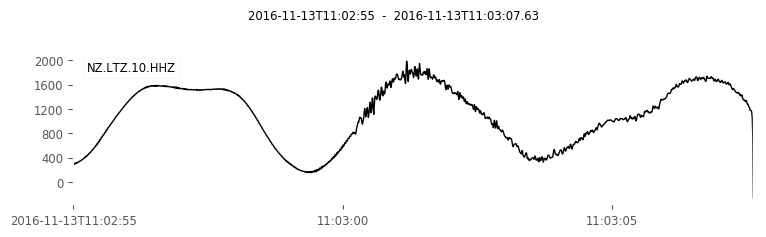

In [8]:
fig = tr.plot(starttime=UTCDateTime(2016, 11, 13, 11, 2, 55),
              endtime=UTCDateTime(2016, 11, 13, 11, 3, 7, 630000))

Now we can see the background long-period noise recorded by the broadband seismometer. However,
over-printing it is a high-frequency signal, before Kaikoura ruptured (I selected the endtime to just
catch the P-arrival from Kaikoura)...  

Lets see if we can clean up those data by filtering.  We will filter the longer time-series, 
remembering to detrend the data first, and applying a taper to stabalise the filter.
All of these operations can be chained together because each method returns a trace itself. See the
[obspy docs](docs.obspy.org) to see the options available for these methods.  We copy the data first
because these methods work *in-place* on the data, meaning the original data is lost.

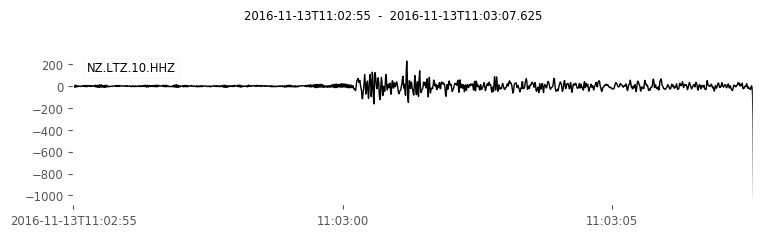

In [9]:
fig = tr.copy().detrend('linear').taper(
    max_length=2, max_percentage=20).filter("highpass", corners=4, freq=2.0).plot(
    starttime=UTCDateTime(2016, 11, 13, 11, 2, 55),
    endtime=UTCDateTime(2016, 11, 13, 11, 3, 7, 625000))

We can clearly see high-frequency arrivals, which turns out to be the P-wave of a foreshock in a 
similar location to the mainshock, but at a much lower magnitude.

**Exercise:** Can you find this foreshock on the other stations?

## Filtering

We have already seen the `.filter` method that provides us with simple access to filter.
We can specify a range of options for that method, which you can investigate on the
[docs page](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.filter.html#obspy.core.stream.Stream.filter) for the `.filter` method.  Key options are the filter type, the corner frequencies, and the
number of corners.  The number of corners is equivalent to the filter order.

Lets try lowpassing the data and seeing what that looks like:

/Users/goride42/miniconda/envs/GPHS445/lib/python3.7/site-packages/matplotlib/dates.py:1322: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  ' Defaulting to {0}.'.format(interval))


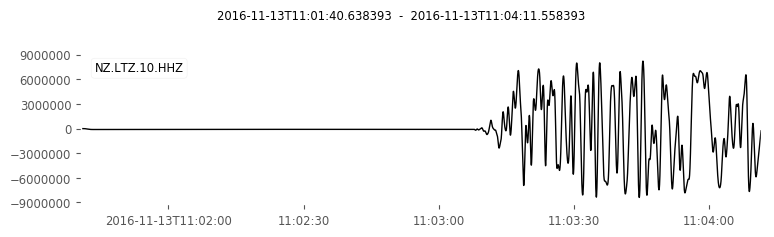

In [10]:
# NBVAL_IGNORE_OUTPUT
fig = tr.copy().detrend('linear').taper(
    max_percentage=20, max_length=2).filter(
    "lowpass", corners=4, freq=1.0).plot()

**Exercise:** Bandpass the data between 2 and 10 Hz - don't forget to detrend and taper the data
to stabalise the Fourier transform.

## Spectrograms

Spectrogams plot the frequency content of a waveform in time. A common way of doing this
is to chunk the data into sections and take the FFT of those sections. The result is an image
with colours representing relative power of different frequencies through time.  Obspy
provides a `.spectrogram` method to do this.  We will use this to look at the frequency content
prior to the mainshock:

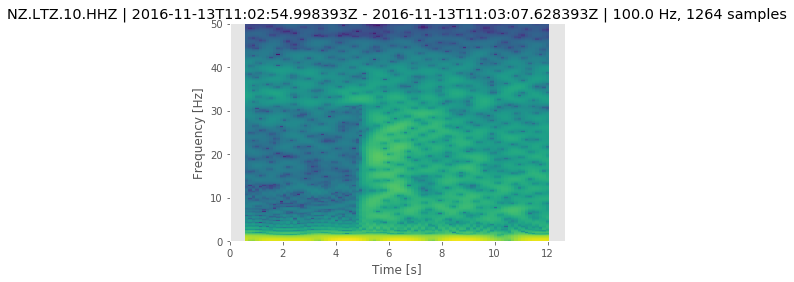

In [11]:
# We can extract the chunk of data that we want to look at using the trim method,
# This cuts the data in-place, so we copy first.
tr_foreshock = tr.copy().trim(
    starttime=UTCDateTime(2016, 11, 13, 11, 2, 55),
    endtime=UTCDateTime(2016, 11, 13, 11, 3, 7, 625000))
# Here we use a logarithmic amplitude scale using dbscale=True
# NBVAL_IGNORE_OUTPUT
fig = tr_foreshock.spectrogram(dbscale=True)

We can see strong (bright colours) low-frequency energy throughout the waveform, which we knew just
by looking at the waveforms.  There is also an increase in higher frequency energy corresponding
to the arrival of the foreshock, as expected.  Spectrograms can be a useful way to look for changes
in frequency content, which might be associated with signals.

## Getting data from data centres

For a long time, seismology has relied on open sharing of data - initially sharing phase
arrival times to locate earthquakes, but more recently waveform data is being shared.  Data
centres such as GeoNet, IRIS and others provide access via a range of webservices.  The most common
is the FDSN (Federated Digital Seismograph Networks) protocol. Obspy provides access for a few
protocols, but we will just use FDSN here.

FDSN allows sharing of waveform data as well as event and station meta-data, making it a *one-stop-shop*
for all your earthquake needs.  We will use this to get waveform data for a couple of other stations
in New Zealand for the Kaikoura earthquake, as well as the event data for this earthquake:

In [12]:
from obspy.clients.fdsn import Client

client = Client("GEONET")  # This tells the client where to ask for data from
st = client.get_waveforms(
    network="NZ", station="APZ", location="10", channel="HH?",
    starttime=UTCDateTime(2016, 11, 13, 11),
    endtime=UTCDateTime(2016, 11, 13, 11, 10))
print(st)

3 Trace(s) in Stream:
NZ.APZ.10.HHE | 2016-11-13T10:59:56.268394Z - 2016-11-13T11:10:01.178394Z | 100.0 Hz, 60492 samples
NZ.APZ.10.HHN | 2016-11-13T10:59:59.728394Z - 2016-11-13T11:10:00.978394Z | 100.0 Hz, 60126 samples
NZ.APZ.10.HHZ | 2016-11-13T10:59:55.758394Z - 2016-11-13T11:10:00.938394Z | 100.0 Hz, 60519 samples


That stream contains data from a station on Stewart Island. Note that FDSN queries support
wildcards (the ? means any single character, a * means any string). 
Lets get data from another station on Chatham Island, and one in the Kermadecs.  Note that streams
support addition, which will append streams together: below we use the in-place addition
operator `+=` to add streams to the stream we already have:

In [13]:
for station in ['GLKZ', "CTZ"]:
    st += client.get_waveforms(
        network="NZ", station=station, location="10", channel="HH?",
        starttime=UTCDateTime(2016, 11, 13, 11),
        endtime=UTCDateTime(2016, 11, 13, 11, 10))
print(st)

9 Trace(s) in Stream:
NZ.APZ.10.HHE  | 2016-11-13T10:59:56.268394Z - 2016-11-13T11:10:01.178394Z | 100.0 Hz, 60492 samples
NZ.APZ.10.HHN  | 2016-11-13T10:59:59.728394Z - 2016-11-13T11:10:00.978394Z | 100.0 Hz, 60126 samples
NZ.APZ.10.HHZ  | 2016-11-13T10:59:55.758394Z - 2016-11-13T11:10:00.938394Z | 100.0 Hz, 60519 samples
NZ.GLKZ.10.HHE | 2016-11-13T10:59:58.173129Z - 2016-11-13T11:10:00.473129Z | 100.0 Hz, 60231 samples
NZ.GLKZ.10.HHN | 2016-11-13T10:59:58.343129Z - 2016-11-13T11:10:01.933129Z | 100.0 Hz, 60360 samples
NZ.GLKZ.10.HHZ | 2016-11-13T10:59:59.163129Z - 2016-11-13T11:10:00.813129Z | 100.0 Hz, 60166 samples
NZ.CTZ.10.HHE  | 2016-11-13T10:59:58.738385Z - 2016-11-13T11:10:00.298385Z | 100.0 Hz, 60157 samples
NZ.CTZ.10.HHN  | 2016-11-13T10:59:57.998385Z - 2016-11-13T11:10:00.448385Z | 100.0 Hz, 60246 samples
NZ.CTZ.10.HHZ  | 2016-11-13T10:59:59.478385Z - 2016-11-13T11:10:00.118385Z | 100.0 Hz, 60065 samples


Now lets get the event data for the Kaikoura mainshock, we will use the filter methods provided by
`.get_events` to select only those events in the GeoNet catalog over magnitude 7 on the hour
around Kaikoura.

In [14]:
catalog = client.get_events(
    minmagnitude=7,    
    starttime=UTCDateTime(2016, 11, 13, 11),
    endtime=UTCDateTime(2016, 11, 13, 12))
print(catalog)

1 Event(s) in Catalog:
2016-11-13T11:02:56.346094Z | -42.693, +173.022 | 7.820379733 Mw(mB) | manual


This gives us a catalog object containing one event.  Obspy supports reading and writing
catalogs in a range of formats, but the most common, and recommended for portability is QuakeML, 
however, large catalogs can be slow to read or write to and from QuakeML.

To start off, lets look at what this catalog contains.  A catalog is essentially a list of events,
each event has a lot of information in it:

In [15]:
print(catalog[0])

Event:	2016-11-13T11:02:56.346094Z | -42.693, +173.022 | 7.820379733 Mw(mB) | manual

	            resource_id: ResourceIdentifier(id="smi:nz.org.geonet/2016p858000")
	             event_type: 'earthquake'
	          creation_info: CreationInfo(agency_id='WEL(GNS_Primary)', author='scevent@akeqp01.geonet.org.nz', creation_time=UTCDateTime(2016, 11, 13, 11, 3, 27, 886738))
	    preferred_origin_id: ResourceIdentifier(id="smi:nz.org.geonet/Origin#20161116052725.210418.52361")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:nz.org.geonet/Magnitude#20161116052734.469407.55057")
	                   ---------
	     event_descriptions: 1 Elements
	               comments: 1 Elements
	                  picks: 189 Elements
	             amplitudes: 200 Elements
	                origins: 1 Elements
	             magnitudes: 5 Elements
	     station_magnitudes: 200 Elements


You can see that this event has a lot of picks (189), and lots of amplitude picks associated with it.
There are also five different magnitudes, and 200 station magnitudes. Lets look at the 
different magnitudes:

In [16]:
for magnitude in catalog[0].magnitudes:
    print(magnitude)

Magnitude
	                     resource_id: ResourceIdentifier(id="smi:nz.org.geonet/Magnitude#20161116052734.390205.54854")
	                             mag: 7.36346279 [uncertainty=0.2497736769]
	                  magnitude_type: 'MLv'
	                       origin_id: ResourceIdentifier(id="smi:nz.org.geonet/Origin#20161116052725.210418.52361")
	                       method_id: ResourceIdentifier(id="smi:nz.org.geonet/trimmed_mean")
	                   station_count: 58
	                   creation_info: CreationInfo(agency_id='WEL(GNS_Primary)', author='annak@akeqx01.geonet.org.nz', creation_time=UTCDateTime(2016, 11, 16, 5, 27, 34, 390299))
	                            ---------
	 station_magnitude_contributions: 76 Elements
Magnitude
	                     resource_id: ResourceIdentifier(id="smi:nz.org.geonet/Magnitude#20161116052734.422399.54931")
	                             mag: 7.763918273 [uncertainty=0.3423031014]
	                  magnitude_type: 'ML'
	               

GeoNet will often calculate a few different magnitudes for events - we will talk about what these all
mean later in the course.  For now it is worth noting that magnitudes based on body-wave amplitude
do not usually give good results for large earthquakes.

Lets look at what information is with one of the picks:

In [17]:
print(catalog[0].picks[0])

Pick
	     resource_id: ResourceIdentifier(id="smi:nz.org.geonet/20161113.110307.63-AIC-NZ.LTZ.10.HHZ")
	            time: UTCDateTime(2016, 11, 13, 11, 3, 7, 638393)
	     waveform_id: WaveformStreamID(network_code='NZ', station_code='LTZ', channel_code='HHZ', location_code='10')
	       filter_id: ResourceIdentifier(id="smi:nz.org.geonet/BW(4,2.5,15)")
	       method_id: ResourceIdentifier(id="smi:nz.org.geonet/AIC")
	      phase_hint: 'P'
	 evaluation_mode: 'automatic'
	   creation_info: CreationInfo(agency_id='WEL(GNS_Primary)', author='scautopick@akeqp01.geonet.org.nz', creation_time=UTCDateTime(2016, 11, 13, 11, 3, 10, 430324))


With the pick we get told what channel it is assciated with (`waveform_id`), what phase it is likely
to be (`phase_hint`), what the pick-time is (`time`), who made the pick (`creation_info.author`, in
this case it was the seiscomp autopicker) as well as other useful info.  This kind of extensive
information makes it possible to evaluate the quality of the pick and try to reproduce the pick.

## Plotting event maps

Lets get some more events and see where they have been located.  To do this we will drop the minimum
magnitude down from our previous query, which should give us a lot of aftershocks, even in the first
hour.  Later we will talk about Omori aftershock decay and how we expect most aftershocks early
in the sequence:

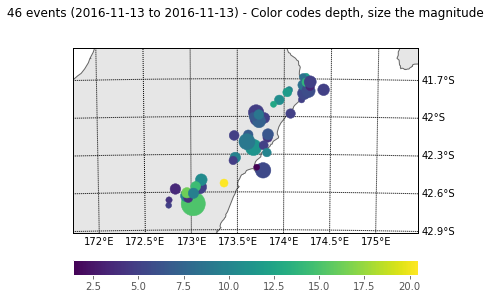

In [18]:
catalog = client.get_events(
    minmagnitude=4,    
    starttime=UTCDateTime(2016, 11, 13, 11),
    endtime=UTCDateTime(2016, 11, 13, 12))
fig = catalog.plot(
    projection="local", resolution="h", label=None)

In this plot earthquake epicenters are plotted as dots, scaled by magnitude. The colour-scale
shows the depth (in km) of the hypocenter.

We are not restricted to local catalogs though: lets try downloading the global catalog from IRIS
above magnitude 6 for 2016:

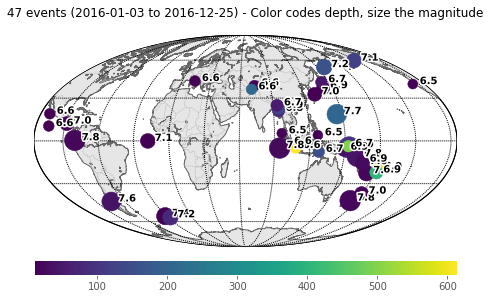

In [19]:
client = Client("IRIS")
catalog = client.get_events(
    minmagnitude=6.5,
    starttime=UTCDateTime(2016, 1, 1),
    endtime=UTCDateTime(2017, 1, 1))
fig = catalog.plot()

That concludes our short tour of obspy! There is a **lot** more useful code in obspy, and
if you want to do something with seismic data or event data it is worth looking their first
before you write your own code.  The [obspy tutorials](https://docs.obspy.org/tutorial/) demonstrates
a lot of other features, and the documentation is quite extensive. Search their docs for help when you
need it.